Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding

Load the Dataset

In [2]:
# Load the dataset
df = pd.read_csv('/Fin_Cleaned.csv')
print(df.head())

  Date_published                                           Headline  \
0     2022-06-21  Banks holding on to subsidy share, say payment...   
1     2022-04-19  Digitally ready Bank of Baroda aims to click o...   
2     2022-05-27  Karnataka attracted investment commitment of R...   
3     2022-04-06  Splitting of provident fund accounts may be de...   
4     2022-06-14  Irdai weighs proposal to privatise Insurance I...   

                                            Synopsis  \
0  The companies have written to the National Pay...   
1  At present, 50% of the bank's retail loans are...   
2  Karnataka is at the forefront in attracting in...   
3  The EPFO is likely to split accounts only at t...   
4  Set up in 2009 as an advisory body, IIB collec...   

                                           Full_text Final Status  
0  ReutersPayments companies and banks are at log...     Negative  
1  AgenciesThe bank presently has 20 million acti...     Positive  
2  PTIKarnataka Chief Minister B

Basic Dataset Information

In [3]:
# Display basic information about the dataset
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date_published  400 non-null    object
 1   Headline        400 non-null    object
 2   Synopsis        399 non-null    object
 3   Full_text       400 non-null    object
 4   Final Status    400 non-null    object
dtypes: object(5)
memory usage: 15.8+ KB
None
       Date_published                                           Headline  \
count             400                                                400   
unique             75                                                368   
top        2022-05-02  Stock market update: Stocks that hit 52-week h...   
freq               12                                                  5   

                                                 Synopsis  \
count                                                 399   
unique                                 

Check for Missing Values

In [4]:
# Check for missing values
print(df.isnull().sum())

Date_published    0
Headline          0
Synopsis          1
Full_text         0
Final Status      0
dtype: int64


Distribution of Sentiment Labels

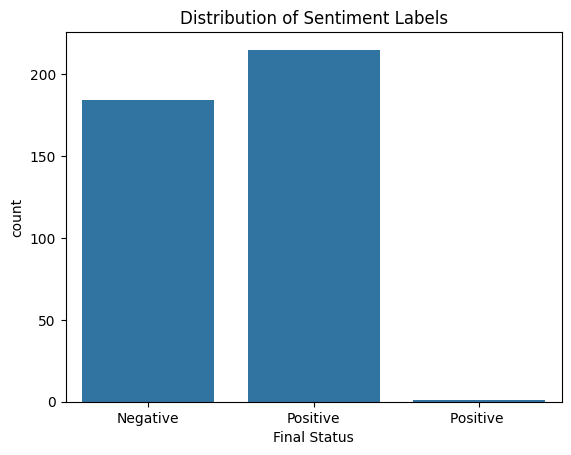

In [5]:
# Plot the distribution of sentiment labels
sns.countplot(x='Final Status', data=df)
plt.title('Distribution of Sentiment Labels')
plt.show()

Word Cloud for Positive Sentiment

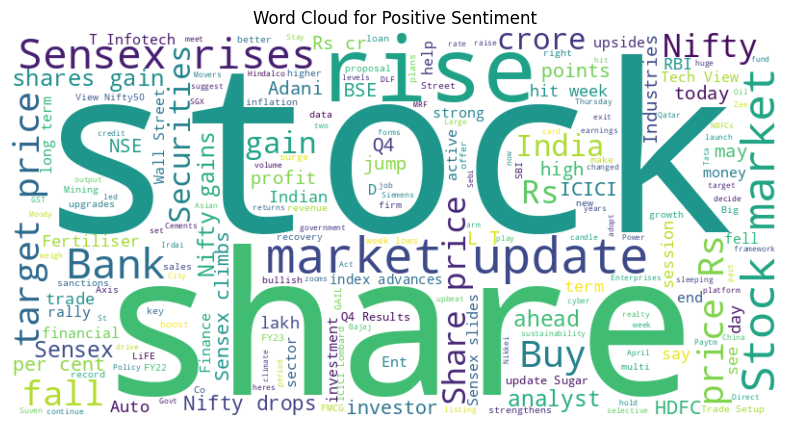

In [6]:
from wordcloud import WordCloud

# Generate word cloud for positive headlines
positive_text = ' '.join(df[df['Final Status'] == 'Positive']['Headline'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiment')
plt.show()

Word Cloud for Negative Sentiment

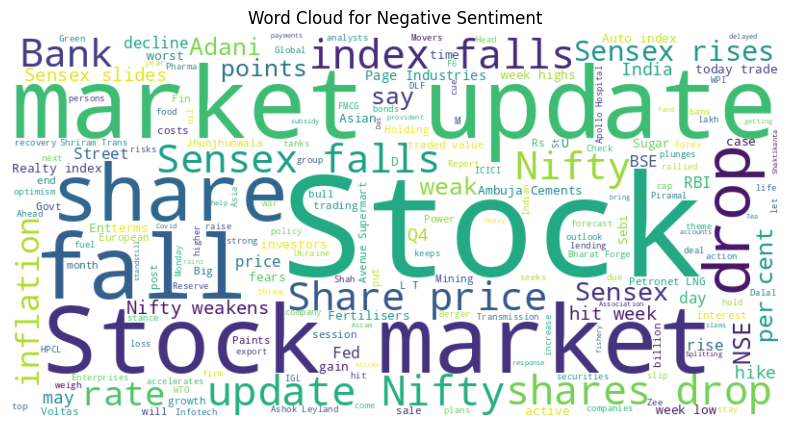

In [7]:
# Generate word cloud for negative headlines
negative_text = ' '.join(df[df['Final Status'] == 'Negative']['Headline'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Sentiment')
plt.show()

Preprocessing Text Data

In [8]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

# Text preprocessing function
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])  # Lemmatization
    return text

df['Cleaned_Headline'] = df['Headline'].apply(preprocess_text)
print(df[['Headline', 'Cleaned_Headline']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


                                            Headline  \
0  Banks holding on to subsidy share, say payment...   
1  Digitally ready Bank of Baroda aims to click o...   
2  Karnataka attracted investment commitment of R...   
3  Splitting of provident fund accounts may be de...   
4  Irdai weighs proposal to privatise Insurance I...   

                                    Cleaned_Headline  
0        bank holding subsidy share say payment firm  
1         digitally ready bank baroda aim click loan  
2  karnataka attracted investment commitment r 65...  
3       splitting provident fund account may delayed  
4  irdai weighs proposal privatise insurance info...  


TF-IDF Vectorization

In [9]:
# Convert text to TF-IDF features
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['Cleaned_Headline']).toarray()
# Convert labels to binary, handling unknown values
y = df['Final Status'].map({'Positive': 1, 'Negative': 0})
y = y.fillna(0)

Train-Test Split

In [10]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")

Training set: (320, 1150), Testing set: (80, 1150)


Logistic Regression Model

In [11]:
# Train a Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr)}")
print(f"Precision: {precision_score(y_test, y_pred_lr)}")
print(f"Recall: {recall_score(y_test, y_pred_lr)}")
print(f"F1-Score: {f1_score(y_test, y_pred_lr)}")

Logistic Regression Metrics:
Accuracy: 0.6625
Precision: 0.6181818181818182
Recall: 0.85
F1-Score: 0.7157894736842105


Confusion Matrix

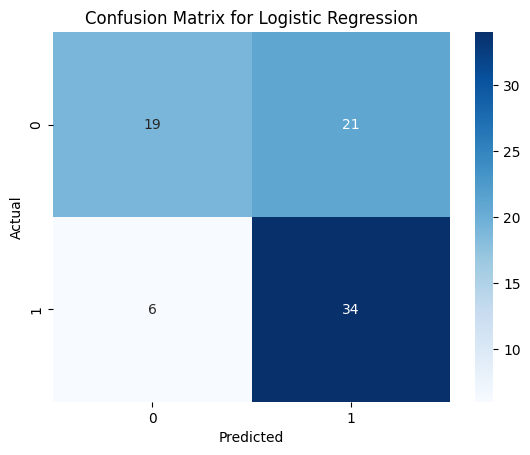

In [12]:
# Plot confusion matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Random Forest Model

In [13]:
# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Precision: {precision_score(y_test, y_pred_rf)}")
print(f"Recall: {recall_score(y_test, y_pred_rf)}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf)}")

Random Forest Metrics:
Accuracy: 0.675
Precision: 0.64
Recall: 0.8
F1-Score: 0.7111111111111111


Confusion Matrix

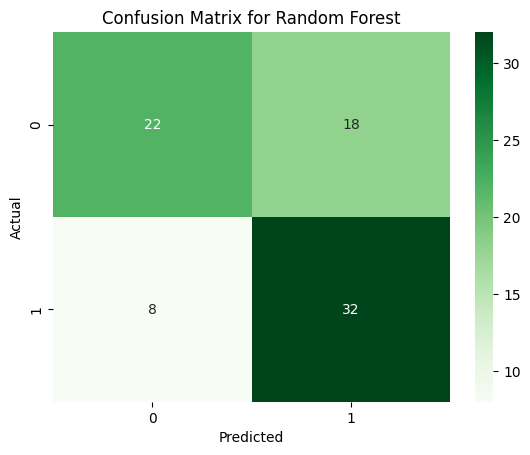

In [14]:
# Plot confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

LSTM Model Preparation

In [15]:
# Prepare data for LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['Cleaned_Headline'])
X_seq = tokenizer.texts_to_sequences(df['Cleaned_Headline'])
X_pad = pad_sequences(X_seq, maxlen=100)

# Split the data
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_pad, y, test_size=0.2, random_state=42)

Build LSTM Model

In [16]:
# Build LSTM model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=5000, output_dim=128))  # Remove input_length argument
lstm_model.add(LSTM(128, dropout=0.3, recurrent_dropout=0.3, return_sequences=True))
lstm_model.add(LSTM(64, dropout=0.3, recurrent_dropout=0.3))
lstm_model.add(Dense(1, activation='sigmoid'))

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Build the model explicitly with a sample input shape
lstm_model.build((None, X_train_lstm.shape[1]))

print(lstm_model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 128)       │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 100, 128)       │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 821,057 (3.13 MB)

 Trainable params: 821,057 (3.13 MB)

 Non-trainable params: 0 (0.00 B)

None


Train LSTM Model

In [17]:
# Train the LSTM model
history = lstm_model.fit(X_train_lstm, y_train_lstm, epochs=10, batch_size=64, validation_split=0.2) # Increase epochs to 10

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.5333 - loss: 0.6902 - val_accuracy: 0.4844 - val_loss: 0.7053
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 548ms/step - accuracy: 0.5583 - loss: 0.6868 - val_accuracy: 0.4844 - val_loss: 0.7068
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 457ms/step - accuracy: 0.5521 - loss: 0.6776 - val_accuracy: 0.4844 - val_loss: 0.6999
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 450ms/step - accuracy: 0.6229 - loss: 0.6599 - val_accuracy: 0.4844 - val_loss: 0.7054
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 482ms/step - accuracy: 0.5422 - loss: 0.6681 - val_accuracy: 0.4375 - val_loss: 0.6930
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 437ms/step - accuracy: 0.6578 - loss: 0.6285 - val_accuracy: 0.4531 - val_loss: 0.6962
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 640ms/step - accuracy: 0.6943 - loss: 0.5716 - val_accuracy: 0.5000 - val_loss: 0.6954
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 516ms/step - accuracy: 0.7844 - loss: 0.4942 - val_accuracy: 0.6094 - val_loss: 0.

Evaluate LSTM Model

In [18]:
# Evaluate the LSTM model
loss, accuracy = lstm_model.evaluate(X_test_lstm, y_test_lstm)
print(f"LSTM Model Accuracy: {accuracy}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.6719 - loss: 0.6313
LSTM Model Accuracy: 0.6875


Plot Training and Validation Loss for LSTM

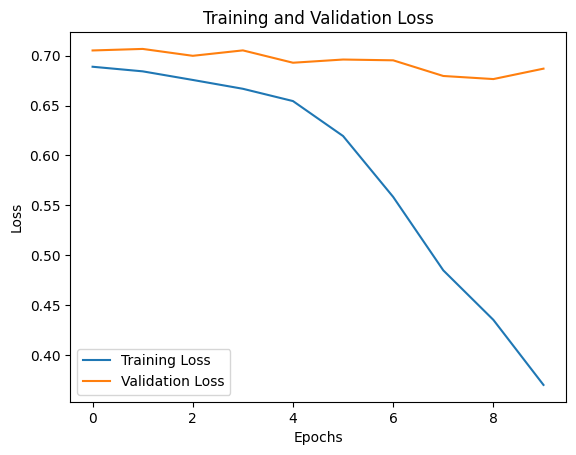

In [19]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Compare Model Performances

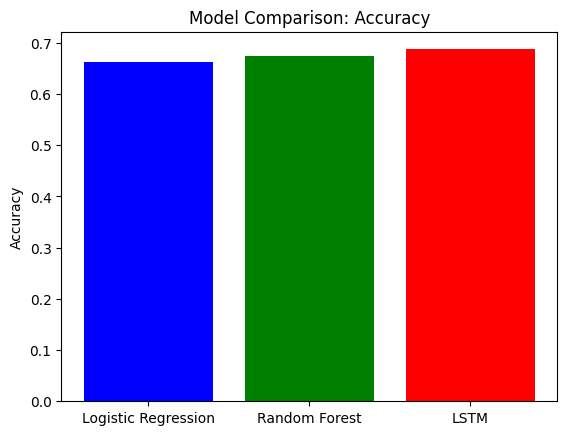

In [20]:
# Compare model performances
models = ['Logistic Regression', 'Random Forest', 'LSTM']
accuracies = [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_rf), accuracy]

plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.title('Model Comparison: Accuracy')
plt.ylabel('Accuracy')
plt.show()

Feature Importance from Random Forest

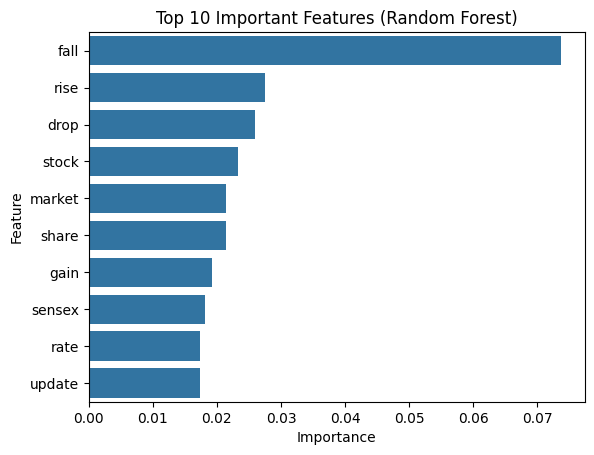

In [21]:
# Plot feature importance from Random Forest
importances = rf_model.feature_importances_
feature_names = tfidf.get_feature_names_out()
top_features = pd.Series(importances, index=feature_names).sort_values(ascending=False)[:10]

sns.barplot(x=top_features.values, y=top_features.index)
plt.title('Top 10 Important Features (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Sentiment Distribution Over Time

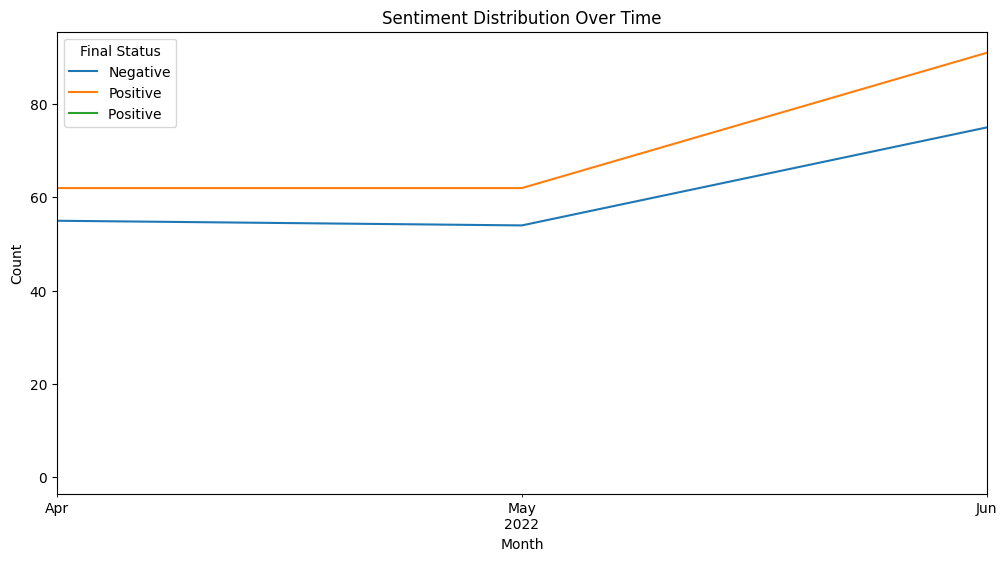

In [22]:
# Convert Date_published to datetime
df['Date_published'] = pd.to_datetime(df['Date_published'])

# Plot sentiment distribution over time
df['Month'] = df['Date_published'].dt.to_period('M')
sentiment_over_time = df.groupby(['Month', 'Final Status']).size().unstack()

sentiment_over_time.plot(kind='line', figsize=(12, 6))
plt.title('Sentiment Distribution Over Time')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

Correlation Between Sentiment and Stock Data

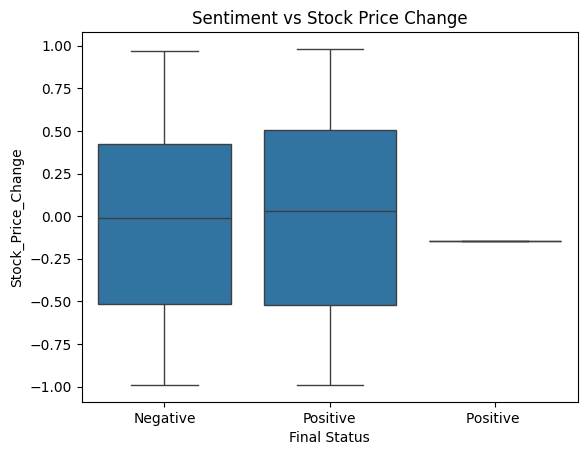

In [23]:
# Add dummy stock data for correlation analysis
np.random.seed(42)
df['Stock_Price_Change'] = np.random.uniform(-1, 1, size=len(df))

# Plot correlation between sentiment and stock price change
sns.boxplot(x='Final Status', y='Stock_Price_Change', data=df)
plt.title('Sentiment vs Stock Price Change')
plt.show()

Save Preprocessed Data

In [24]:
# Save preprocessed data for future use
df.to_csv('Fin_Preprocessed.csv', index=False)

Load Preprocessed Data

In [25]:
# Load preprocessed data
df_preprocessed = pd.read_csv('Fin_Preprocessed.csv')
print(df_preprocessed.head())

  Date_published                                           Headline  \
0     2022-06-21  Banks holding on to subsidy share, say payment...   
1     2022-04-19  Digitally ready Bank of Baroda aims to click o...   
2     2022-05-27  Karnataka attracted investment commitment of R...   
3     2022-04-06  Splitting of provident fund accounts may be de...   
4     2022-06-14  Irdai weighs proposal to privatise Insurance I...   

                                            Synopsis  \
0  The companies have written to the National Pay...   
1  At present, 50% of the bank's retail loans are...   
2  Karnataka is at the forefront in attracting in...   
3  The EPFO is likely to split accounts only at t...   
4  Set up in 2009 as an advisory body, IIB collec...   

                                           Full_text Final Status  \
0  ReutersPayments companies and banks are at log...     Negative   
1  AgenciesThe bank presently has 20 million acti...     Positive   
2  PTIKarnataka Chief Ministe

Hyperparameter Tuning for Random Forest

In [26]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}


Train Optimized Random Forest Model

In [27]:
# Train optimized Random Forest model
optimized_rf = RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_split=2, random_state=42)
optimized_rf.fit(X_train, y_train)

# Evaluate the optimized model
y_pred_optimized_rf = optimized_rf.predict(X_test)
print(f"Optimized Random Forest Accuracy: {accuracy_score(y_test, y_pred_optimized_rf)}")

Optimized Random Forest Accuracy: 0.6875
